In [67]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

# **Reading The .csv File**

In [68]:
# Read csv File
print('\n')
df = pd.read_csv('data.csv', index_col='index')

# Display Data
display(df)
print('\n')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


# **Dropping and Cleaning Data**

In [69]:
# Index Column now refers to patient

print('\n')
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


# **Check for Null Values**

In [70]:
# Check For Null Values

print('\n')
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

# **Print Information**

In [71]:
# Print Information

print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                

# **Replace "level" with Integer**

In [72]:
# Replace "level" with Integer

print('\n')
print('Cancer Levels: ', df['level'].unique())

# Replacing levels with int
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

print('\nColumns in dataframe: \n', df.columns)
print('\n')



Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')




In [73]:
# Round

print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


# **Print and Visualize Columns**

In [74]:
# Print and Visualize Columns

print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

# **Heatmap**

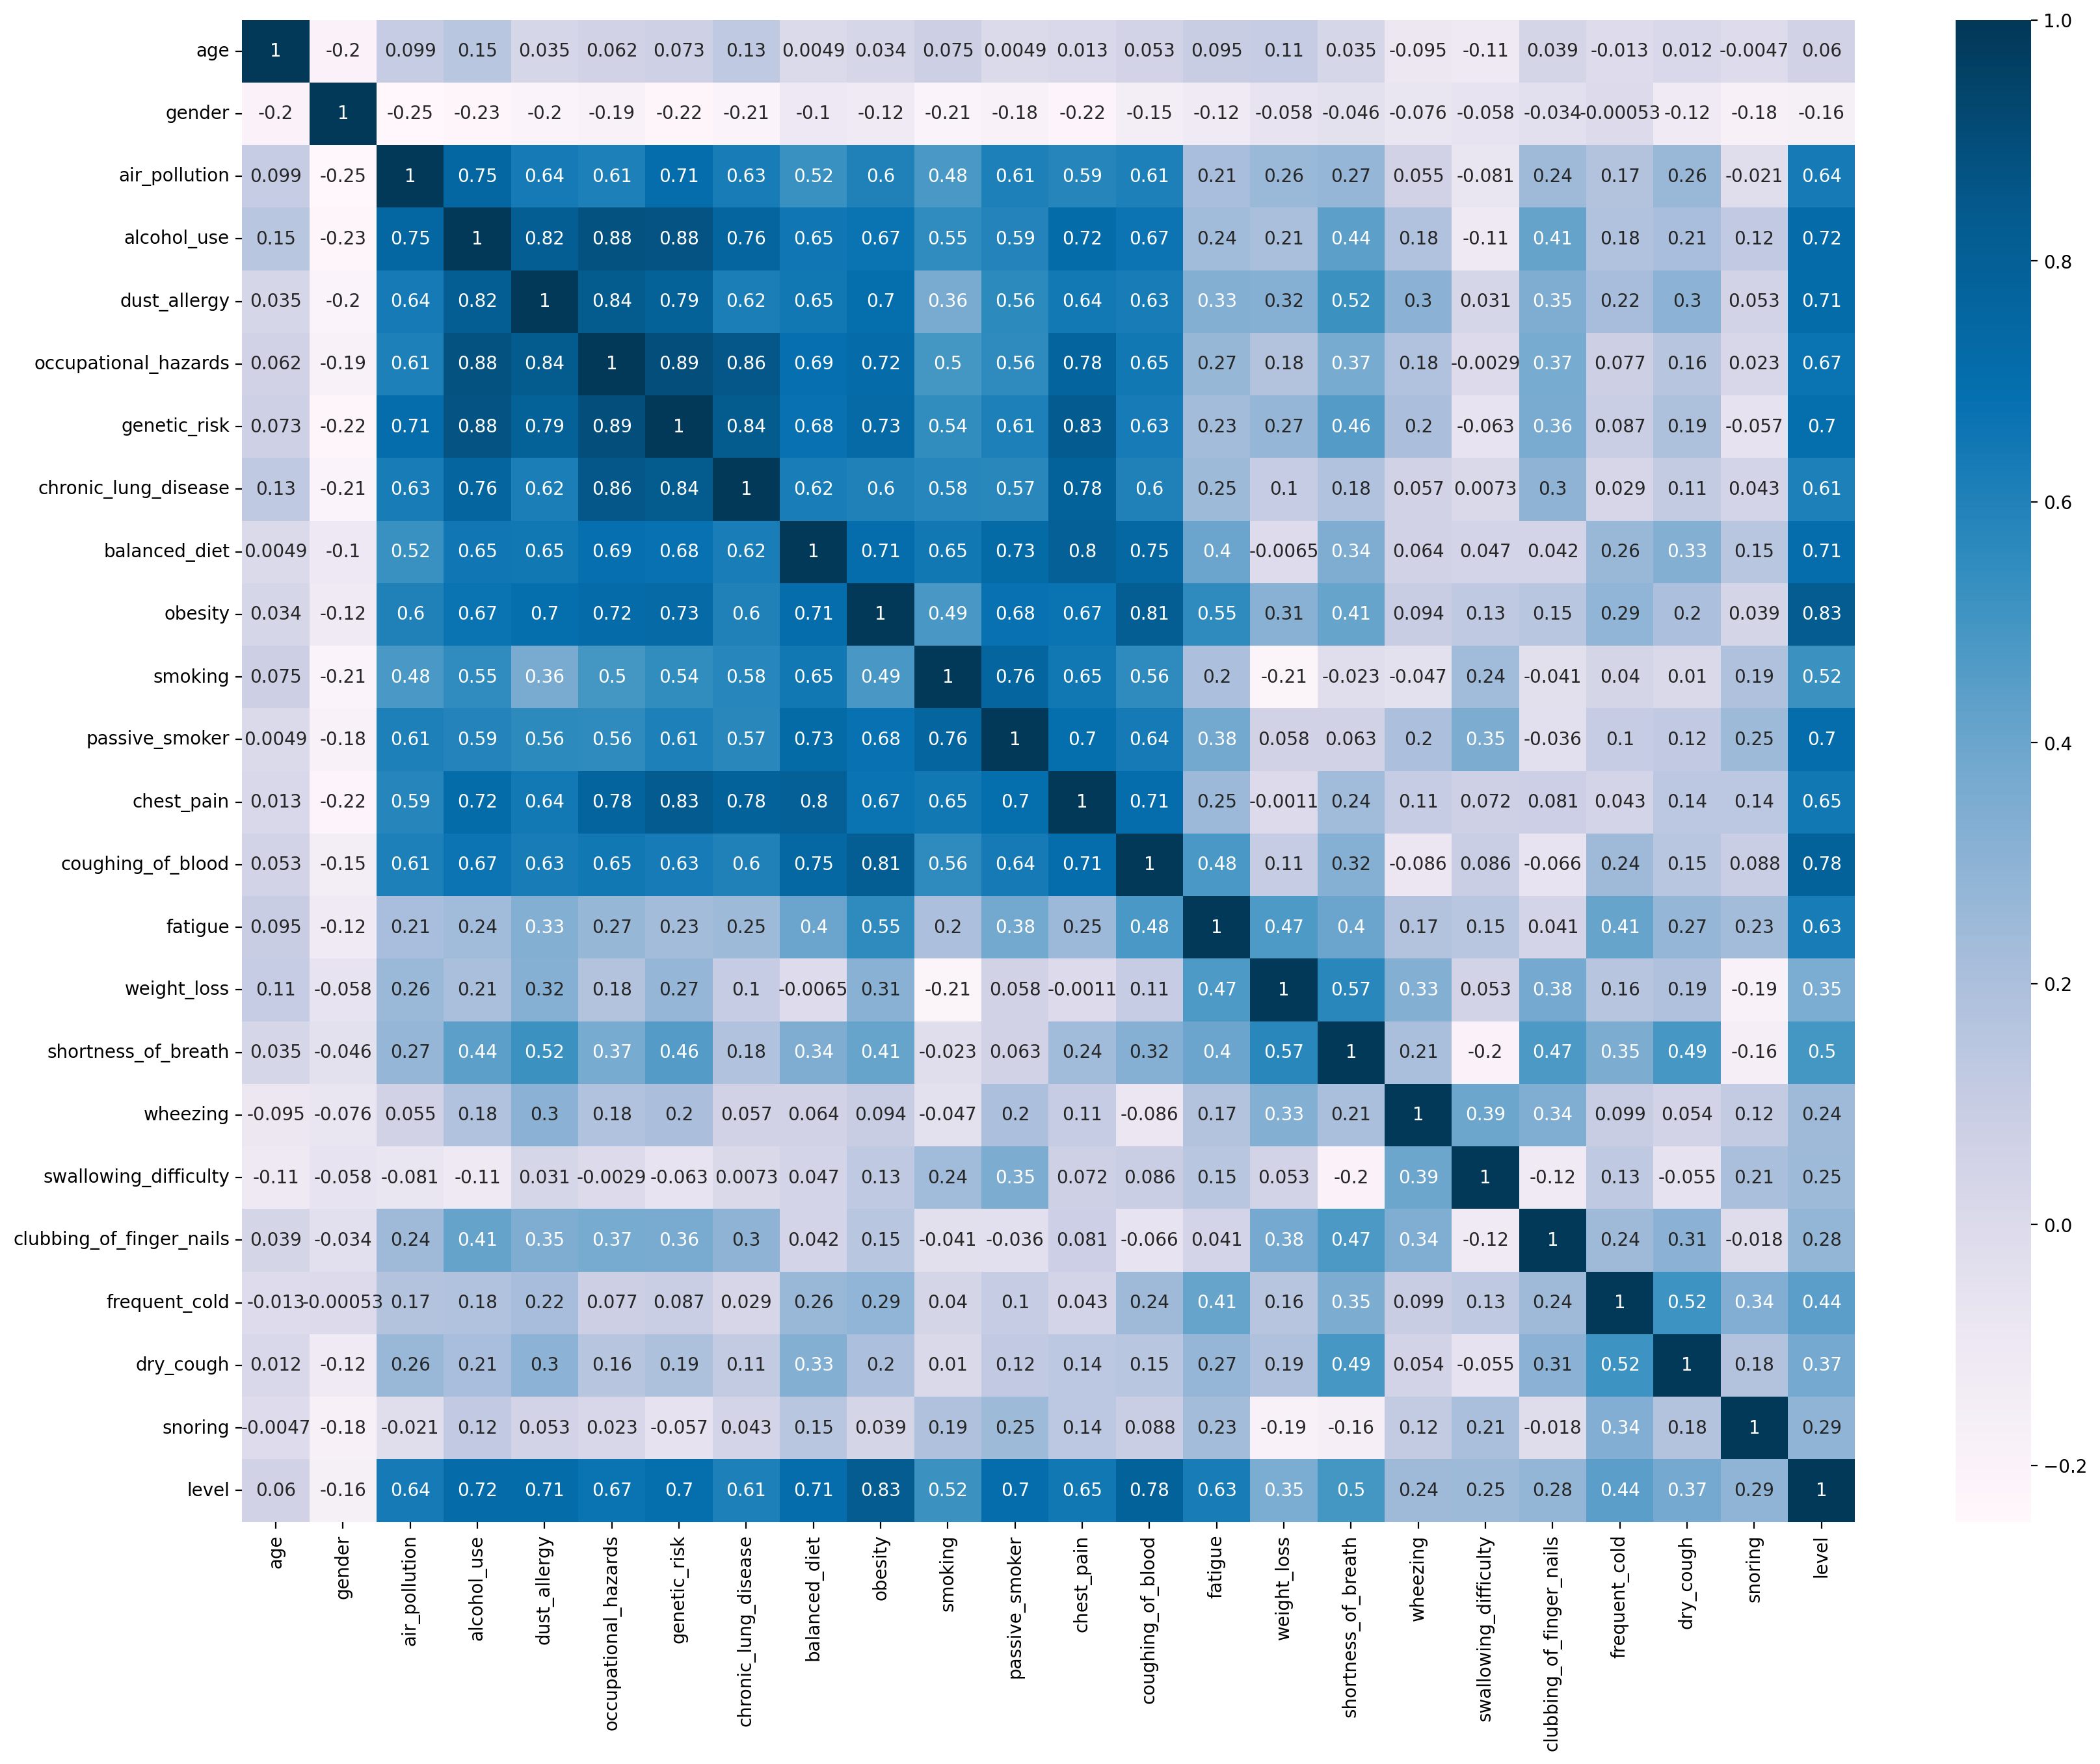

In [75]:
# Heatmap

print('\n')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()
print('\n')

# **Setting Target**

In [76]:
# Setting Target

X = df.drop(columns='level')
y = df.level

print('\n')
display(X.head(), y[:10])
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

In [77]:
print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

# **Train Test Split**

In [78]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (700, 23)
Y train shape:  (700,)


Test Shape

X test shape:  (300, 23)
Y test shape:  (300,)




# **Scaling the Data**

In [79]:
# Data Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
# KNN

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

y_predict1 = knn.predict(X_test_scaled)

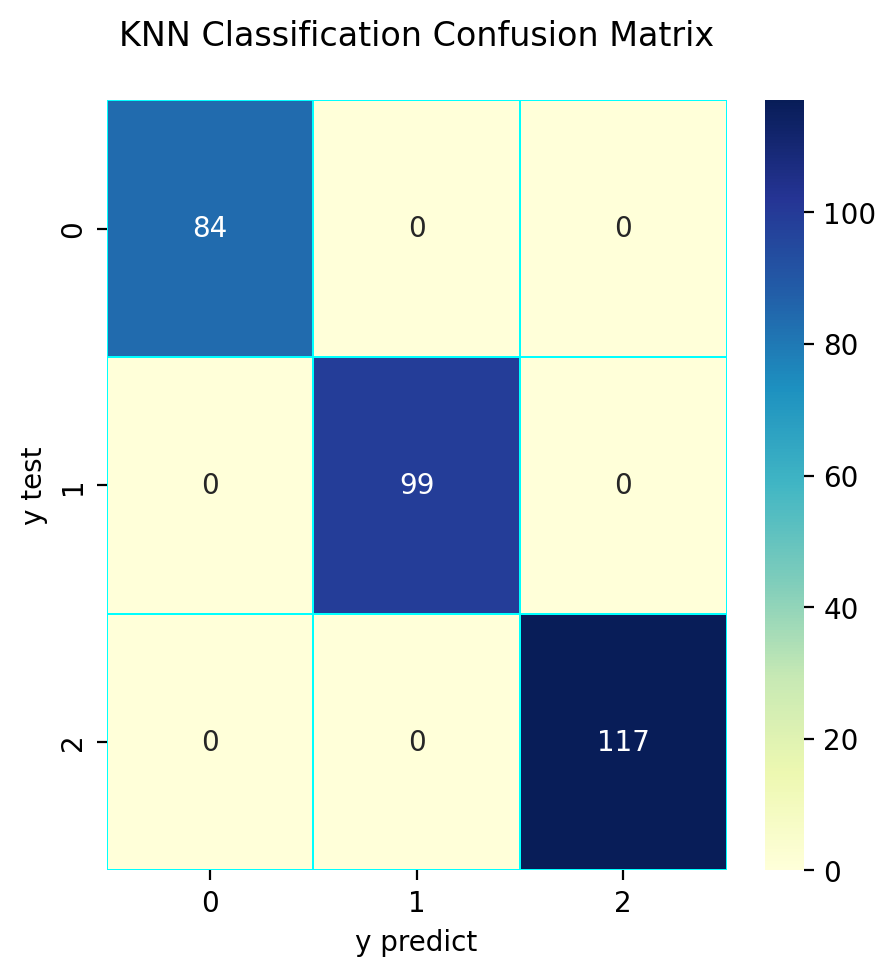

In [81]:
# Confusion Matrix

knn_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [82]:
# Test Score

print('\n')
score_knn = knn.score(X_test_scaled, y_test)
print('KNN Score = ',score_knn)
print('\n')



KNN Score =  1.0




In [83]:
# Classification Report

print('\nClassification Report for KNN\n')
print(classification_report(y_test, y_predict1))
print('\n')


Classification Report for KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





# **Gaussian Naive Bayes**

In [84]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train_scaled, y_train)

y_predict2 = nbcla.predict(X_test_scaled)

**Confusion Matrix**

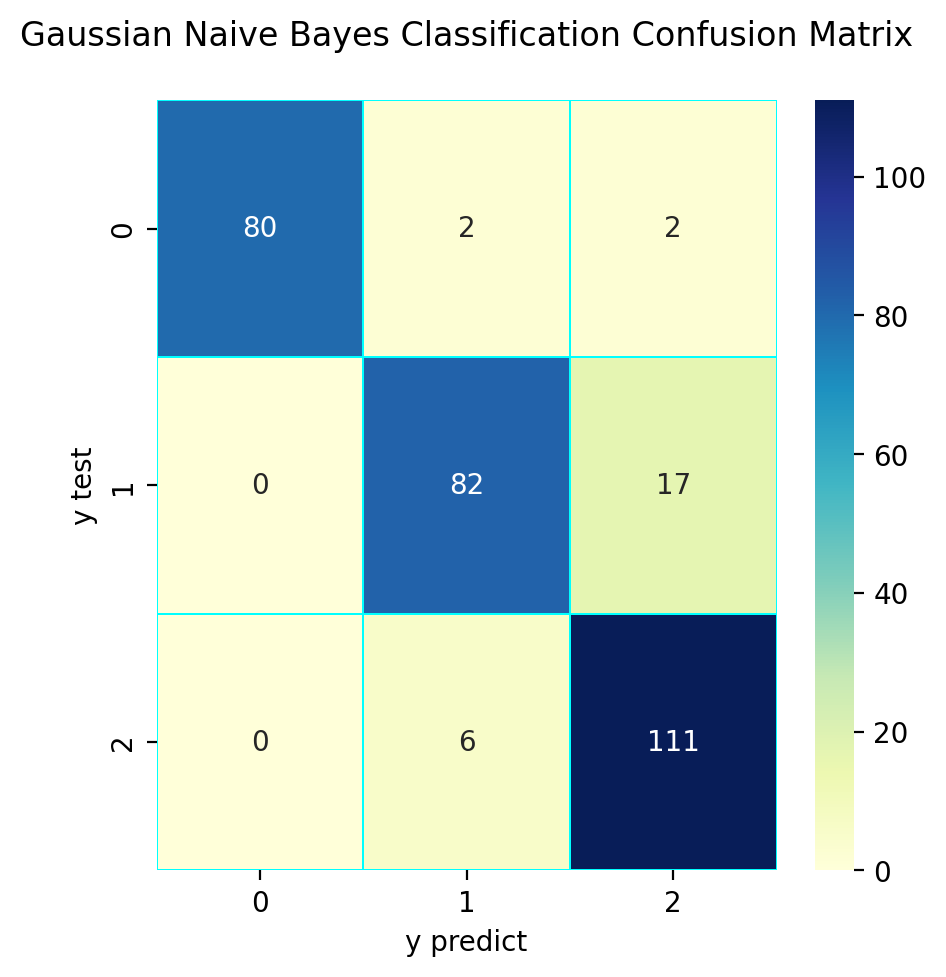

In [85]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [86]:
# Test Score

print('\n')
score_nbcla = nbcla.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)
print('\n')



Gaussian Naive Bayes Score =  0.91




In [87]:
# Classification Report

print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))
print('\n')


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300





# **Decision Tree**

In [88]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train_scaled, y_train)

y_predict3 = dtcla.predict(X_test_scaled)

**Confusion Matrix**

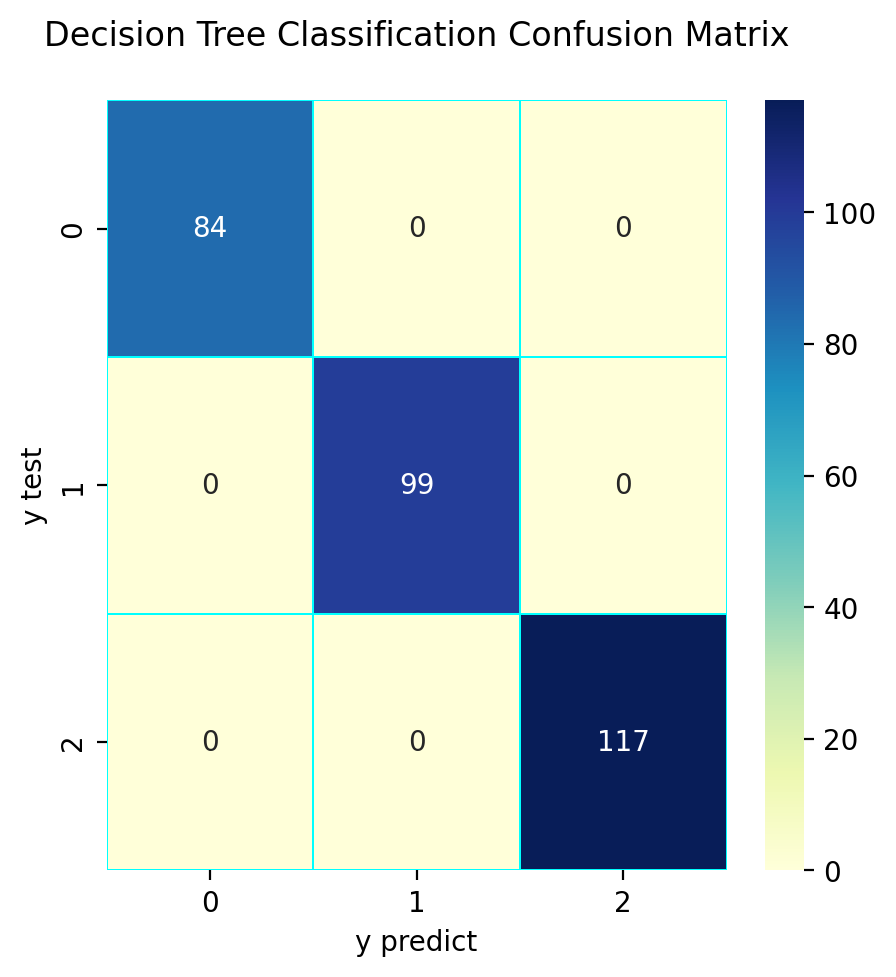

In [89]:
# Confusion Matrix

dtcla_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [90]:
# Test Score
print('\n')
score_dtcla = dtcla.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_dtcla)
print('\n')



Decision Tree Score =  1.0




In [91]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





# **All Test Scores**

In [92]:
# All Test Scores

print('\n')
Testscores = pd.Series([score_knn, score_nbcla, score_dtcla], 
                        index=['Knn Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ']) 
print(Testscores)
print('\n')



Knn Score =               1.00
Naive Bayes Score =       0.91
Decision Tree Score =     1.00
dtype: float64




# **All Confusion Matrices**

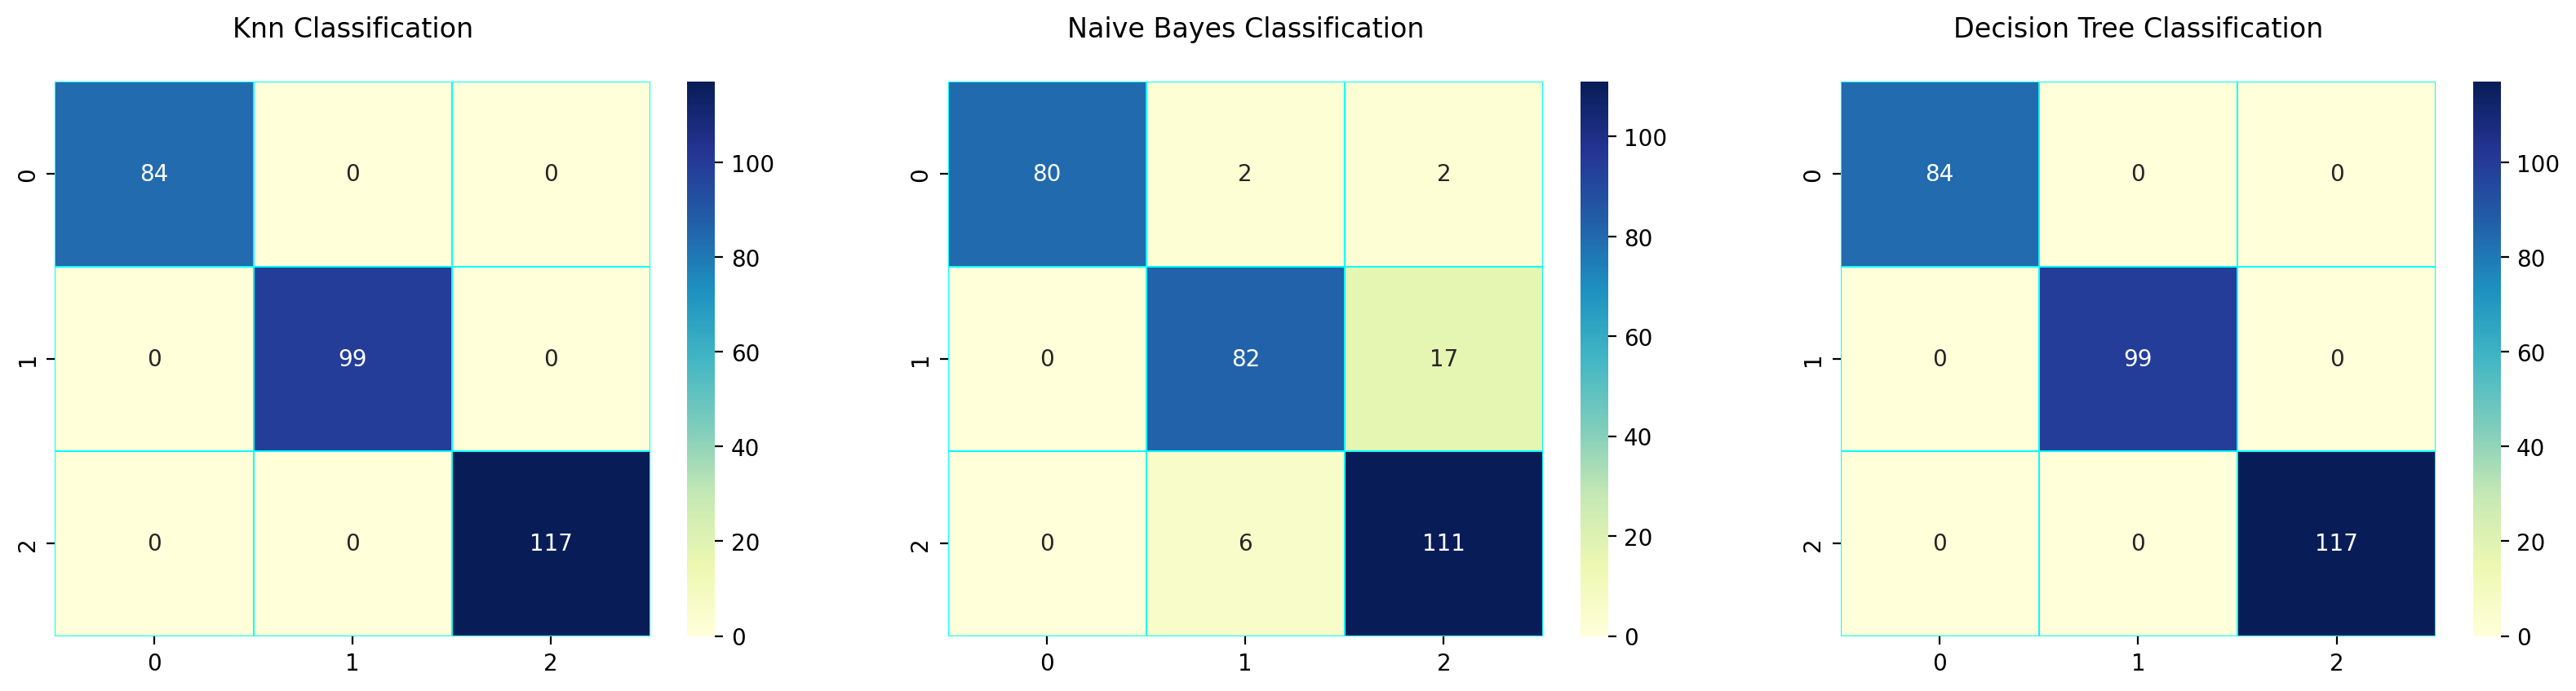

In [93]:
# All Confusion Matrices

print('\n')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Knn Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')

sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)

plt.show()
print('\n')

# **Comparison**

In [94]:
# Comparison of Algorithms

x=['KNN', 'G. Naive Bayes', 'Decision Tree']
y = [score_knn, score_nbcla, score_dtcla]

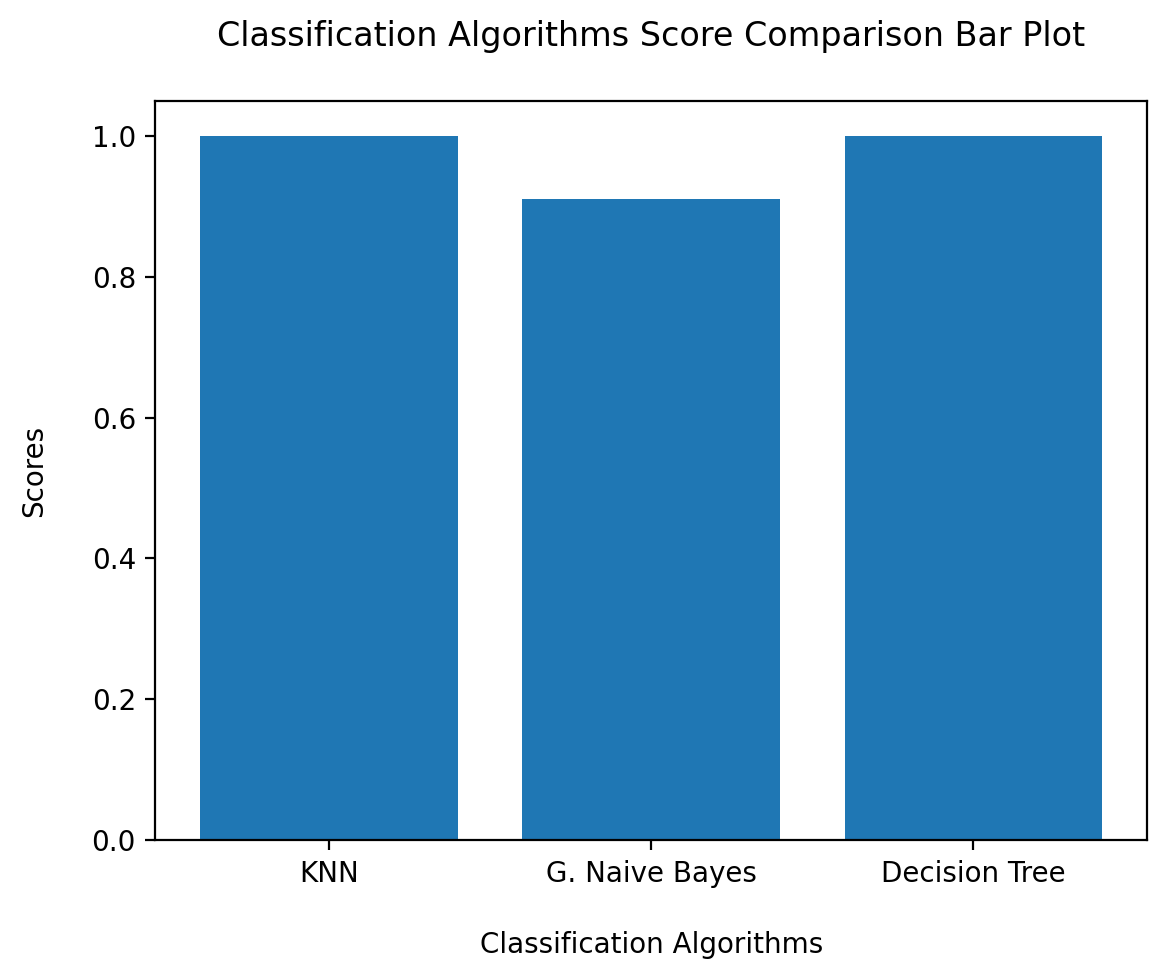

In [95]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()
print('\n')

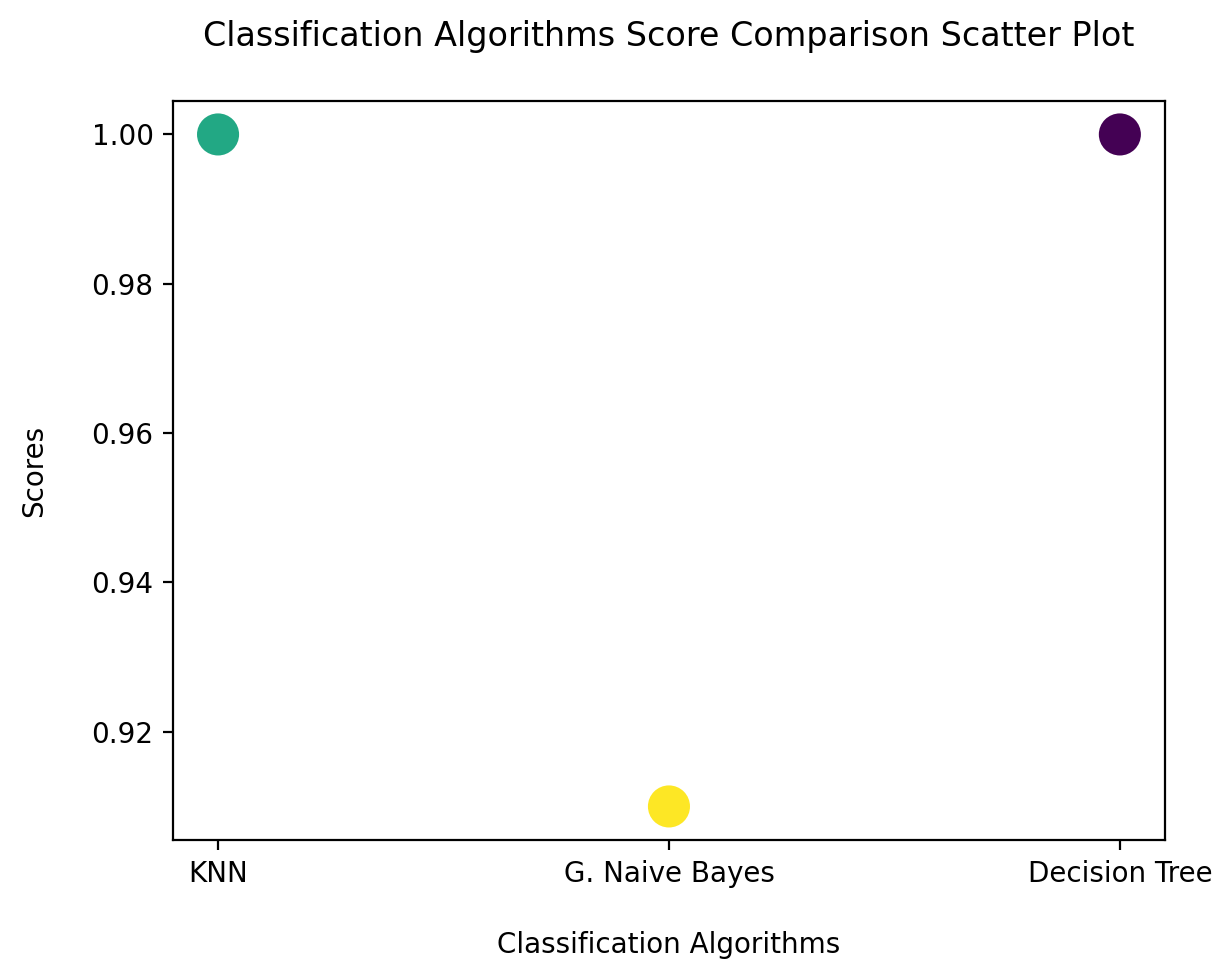

In [96]:
# Scatter Plot

print('\n')
colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()
print('\n')

In [97]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_knn == score_nbcla and score_knn == score_dtcla and score_nbcla == score_dtcla:
    al = True

if score_knn == score_nbcla:
    ln = True
    
if score_knn == score_dtcla:
    ld = True
    
if score_nbcla == score_dtcla:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nKnn and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nKnn and Dicision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_knn > score_nbcla and score_knn > score_dtcla:
        print('\nKnn Performs Better\n')
    if score_nbcla > score_knn and score_nbcla > score_dtcla:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dtcla > score_knn and score_dtcla > score_nbcla:
        print('\nDecision Tree Performs Better\n')


Knn and Dicision Tree Performs Better

